<a href="https://colab.research.google.com/github/Michell203/DingLab/blob/main/DLabCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install scanpy

In [1009]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scipy
import matplotlib.pyplot as plt

import math
from random import randrange

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# from scipy.special import softmax

# https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html - Scanpy preprocess
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_h5ad.html - Scanpy h5ad
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_10x_h5.html - Scanpy 10x h5
# https://scanpy.readthedocs.io/en/stable/index.html - Scanpy webpage

# https://www.partek.com/webinar/understanding-data-formats-and-preprocessing/
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Preprocess
Get a sense of the data (GSM4504959_E12.5_filtered_gene_bc_matrices.h5)

Cell count: 9792,
Gene count: 27998

In [ ]:
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1.var_names_make_unique()
print(t1.X)

In [ ]:
# print(t1.X)
array = t1.X.toarray()
number = 0
for i in range(9791):
  number += array[i,27997]
mean_of_gene1 = number/9791
print(mean_of_gene1)

0.0013277499744663466


In [ ]:
t1.X

In [ ]:
sc.pp.normalize_total(t1, target_sum=1e4)

In [ ]:
pseudobulk_h5_file_1 = t1.X.mean(axis=0)
print(pseudobulk_h5_file_1)

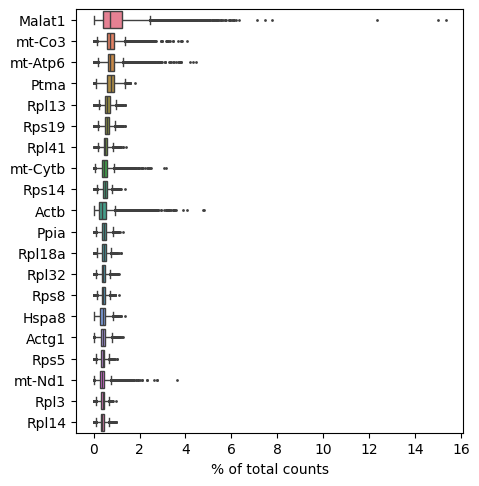

None


In [ ]:
print(sc.pl.highest_expr_genes(t1, n_top=20, ))

In [ ]:
sc.pp.normalize_total(t1, target_sum=1e4)
# sc.pp.log1p(t1)

In [ ]:
pseudobulk_t1 = t1.X.mean(axis=0)
print(pseudobulk_t1)

In [ ]:
# Generate new information about counts
t1.var_names_make_unique()
sc.pp.calculate_qc_metrics(t1, log1p=False, inplace=True)

frame1_obs = pd.DataFrame(t1.obs)
frame1_obs.drop(['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'], axis=1)

frame1_vars = pd.DataFrame(t1.var)

In [ ]:
t1.layers["t1.X"] = t1.X
t1.to_df(layer="t1.X")

,Xkr4,Gm1992,Gm37381,Rp1,Rp1-1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
AAACCTGAGAACTGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCCACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.8082,0.0,0.0,0.0
AAACCTGAGACTAGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.686006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGCCGATTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.892864,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGCTGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTCTTGATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTTGCGCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCATCATGCATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.098853,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


# Create Pseudobulk

In [ ]:
t0 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504960_E15.5_filtered_gene_bc_matrices.h5")
t2 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504961_E17.5_filtered_gene_bc_matrices.h5")
t3 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504962_P3_filtered_gene_bc_matrices.h5")
t4 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504963_P7_filtered_gene_bc_matrices.h5")
t5 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504964_P15_filtered_gene_bc_matrices.h5")
t6 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504965_P42_filtered_gene_bc_matrices.h5")

h5_files = [t0, t1, t2, t3, t4, t5, t6]
pseudo_bulks = []

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_name

In [ ]:
t0.var_names
max_value = t0.X.max()
print(max_value)

4894.0


In [ ]:
def pseudo_bulk(h5_file): # Creates pseudobulk of h5 file
  sc.pp.normalize_total(h5_file, target_sum=1e4)
  pseudobulk_h5_file = h5_file.X.mean(axis=0)

  values = []
  for i in range(pseudobulk_h5_file.shape[1]):
    values.append(pseudobulk_h5_file[0,i])

  return np.array(values)

In [ ]:
def create_pseudo_bulk(h5_files): # Generates pseudobulk from all time-stamps
  pseudo_bulks = []
  for h5_file in h5_files:
    pseudo_h5 = pseudo_bulk(h5_file)
    pseudo_bulks.append(pseudo_h5)

  return np.array(pseudo_bulks)

In [ ]:
obs_names = {} # For .obs of bulk AnnData object
for i in range(len(h5_files)): # 7
  obs_names[i] = "TimeStamp" + str(i)
obs_frame = pd.DataFrame(list(obs_names.items()), columns=['Index', 'TimeStamp'])
print(obs_frame)

In [ ]:
bulks = create_pseudo_bulk(h5_files)
bulks_adata = ad.AnnData(bulks, obs=obs_frame, var=t0.var)

In [ ]:
print(bulks_adata.X)
print(bulks_adata.obs)
print(bulks_adata.var)

In [ ]:
bulks_adata.obs['files'] = ['GSM4504959_E12.5_filtered_gene_bc_matrices.h5', 'GSM4504960_E15.5_filtered_gene_bc_matrices.h5',
                            'GSM4504961_E17.5_filtered_gene_bc_matrices.h5', 'GSM4504962_P3_filtered_gene_bc_matrices.h5',
                            'GSM4504963_P7_filtered_gene_bc_matrices.h5', 'GSM4504964_P15_filtered_gene_bc_matrices.h5',
                            'GSM4504965_P42_filtered_gene_bc_matrices.h5']

In [ ]:
bulks_adata.var['gene_ids']

In [ ]:
bulks_adata.obs['files']

In [ ]:
def pick_gene(gene_no, gene_database=bulks_adata):
  return gene_database.X[:, gene_no]

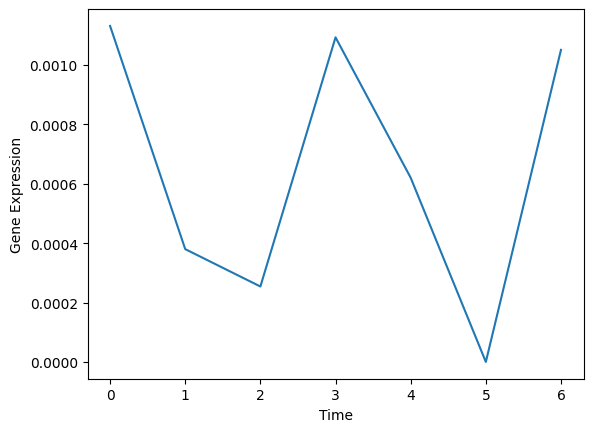

In [ ]:
# Look at time series patterns of a selected gene
gene_timeseries = pick_gene(0)
def plot_geneseries(gene):
  length = [x for x in range(len(gene))]
  plt.plot(length, gene)
  plt.xlabel('Time')
  plt.ylabel('Gene Expression')

plot_geneseries(gene_timeseries)

# Model

### KNN Function
Find neighboring genes

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [918]:
neighbors = NearestNeighbors(n_neighbors=11) # k = 11, k-1 neighbors
neighbors.fit(bulks_adata.X.T)
def find_neighbors(g, neighbors_func=neighbors, gene_database=bulks_adata):
  neighbor_arr = neighbors_func.kneighbors([g])
  return neighbor_arr[1][0][1:]

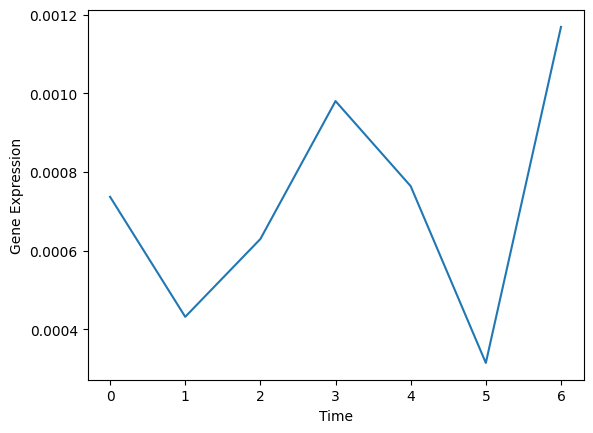

In [919]:
# Check, do the time series looks similar?
gene_0 = pick_gene(0)
gene0_neighbors = find_neighbors(gene_0)
plot_geneseries(pick_gene(gene0_neighbors[2]))

### Data Preprocessing

In [ ]:
# Format input for NN
def format_input(g, gene_database=bulks_adata): # Shape input to our desired format: [g1,...,gt,n1,...,nt,1,2,...,t]
  neighbors = find_neighbors(g, gene_database=gene_database) # Get indices of all neighbors of g
  input = np.array(g)

  for n in neighbors:
    neighbor_gene = np.array(pick_gene(n))
    input = np.concatenate((input, neighbor_gene), axis=None) # Concat neighbors with original gene

  # if input.max() != input.min():
  #   input = (input - input.min()) / (input.max() - input.min()) # Min-Max Normalization

  # time_embeddings = [x for x in range(len(g))]
  # final_input = np.concatenate((input, time_embeddings), axis=None) # Concat time embeddings
  # return final_input

  return input

gene0 = format_input(pick_gene(0))
print(gene0)

In [927]:
# Masking mechanism
def mask(time_points, input, mask_value=0, gene_database=bulks_adata): # Time points start form 0. Time points is of type array
  new_arr = input.copy()
  max_timepoints = bulks_adata.obs.shape[0]
  masked = []

  for n in range(len(input)):
    if n % max_timepoints in time_points: # Mask each time-point for every neighbour
      masked.append(new_arr[n])
      new_arr[n] = mask_value # Masked with zero by default

  return new_arr, masked

test, masked = mask([1,3], gene0)
print(test, masked)

[0.00113179 0.         0.00025406 0.         0.00062037 0.
 0.00105117 0.00119737 0.         0.00026885 0.         0.00042692
 0.00027442 0.00086259 0.00078927 0.         0.00025674 0.
 0.00055388 0.00045457 0.00103483 0.00073662 0.         0.00062924
 0.         0.00076372 0.00031406 0.00116871 0.00120592 0.
 0.00081247 0.         0.00049818 0.         0.00089348 0.00104655
 0.         0.00022693 0.         0.00025067 0.00035469 0.0008038
 0.00083033 0.         0.00071991 0.         0.00031978 0.0001199
 0.00107366 0.00089238 0.         0.00057236 0.         0.00072779
 0.         0.00056064 0.00119889 0.         0.00041971 0.
 0.0004324  0.00041961 0.00139918 0.00126629 0.         0.00042037
 0.         0.00099466 0.         0.0004913  0.0008633  0.
 0.00060465 0.         0.00063329 0.00050132 0.00125818] [0.00037995086, 0.0010933415, 0.00014253063, 0.00066244334, 0.00014743839, 0.001206985, 0.0004313218, 0.0009800738, 0.0007509951, 0.0011252974, 0.00024836956, 0.0014940335, 0.000511

In [1008]:
all_inputs = []
for i in range( int(len(bulks_adata.var)) ):
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i) # Pick gene and format the input
  # masked, value_masked = mask( [randrange(len(gene_i))] , formatted_input) # Mask arbitrary time-point
  # X.append(masked)
  # y.append(value_masked[0])

  all_inputs.append(formatted_input)

In [ ]:
print(all_inputs[0])

In [1011]:
scaler = StandardScaler()
all_inputs = scaler.fit_transform(all_inputs)

In [ ]:
print(all_inputs[100])

In [1016]:
X = []
y = []
for i in range(len(all_inputs)):
  gene_i_input = all_inputs[i]

  time_embeddings = [x for x in range(bulks_adata.obs.shape[0])]
  gene_i_input = np.concatenate((gene_i_input, time_embeddings), axis=None) # Concat time embeddings

  masked, value_masked = mask( [randrange( int(len(bulks_adata.obs)) )] , gene_i_input) # Mask arbitrary time-point
  X.append(masked)
  y.append(value_masked[0])

In [ ]:
print(X[7])
print(y[7])
print(pick_gene(7))
print(all_inputs[7])

In [ ]:
print(np.array(X).max())
print(np.array(X).min())

In [1019]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [894]:
# scaler_X = MinMaxScaler()
# X_train = scaler_X.fit_transform(X_train)
# X_test = scaler_X.transform(X_test)

# scaler_y = MinMaxScaler()
# y_train = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1)).flatten()
# y_test = scaler_y.transform(np.array(y_test).reshape(-1, 1)).flatten()

In [1020]:
# Adapted form https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel, https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/
class GeneDataset(torch.utils.data.Dataset):
  # Characterizes a dataset for PyTorch
  def __init__(self, X, y):
        # self.genes = genes
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

        # self.X = X.detach().clone()
        # self.y = y.detach().clone()

  def __len__(self):
        return len(self.X)

  def __getitem__(self, index):
        # Generates one sample of data
        gene = self.X[index]
        masked_TS = self.y[index]

        return gene, masked_TS

In [1021]:
geneTrainSet = GeneDataset(X_train, y_train)
train_loader = DataLoader(geneTrainSet, shuffle=True, batch_size=32)

In [1022]:
geneTestSet = GeneDataset(X_test, y_test)
test_loader = DataLoader(geneTestSet, shuffle=False, batch_size=32)

In [ ]:
# Mask arbitrary time-point
# Train X, Y
X_train = []
Y_train = []
for i in range(int(len(bulks_adata.var) * 0.8)): # 80%, 20% split
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i) # Pick gene and format the input
  masked, value_masked = mask([randrange(len(gene_i))], formatted_input) # Mask arbitrary time-point
  X_train.append(masked)
  Y_train.append(value_masked[0])

# Test X, Y
X_test = []
Y_test = []
for i in range(int(len(bulks_adata.var) * 0.8)+1, len(bulks_adata.var)):
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i)
  masked, value_masked = mask([randrange(len(gene_i))], formatted_input)
  X_test.append(masked)
  Y_test.append(value_masked[0])

In [ ]:
X_validation = []
Y_validation = []
for i in range(int(len(bulks_adata.var) * 0.8)+1, len(bulks_adata.var)):
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i)
  masked, y = mask([randrange(len(gene_i))], formatted_input)
  X_test.append(masked)
  Y_test.append(y[0])

In [ ]:
# Mask all time-points
# Train X, Y
X_train_t = []
Y_train_t = []
for i in range(int(len(bulks_adata.var) * 0.8)): # 80%, 20% split
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i) # Pick gene and format the input

  for j in range(len(gene_i)): # Mask all time-points
    masked, y = mask([j], formatted_input)
    X_train_t.append(masked)
    Y_train_t.append(y[0])

# Test X, Y
X_test_t = []
Y_test_t = []
for i in range(int(len(bulks_adata.var) * 0.8)+1, len(bulks_adata.var)):
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i)

  for j in range(len(gene_i)):
    masked, y = mask([j], formatted_input)
    X_test_t.append(masked)
    Y_test_t.append(y[0])

In [ ]:
X_train_t = torch.tensor(np.array(X_train), dtype=torch.float32)
Y_train_t = torch.tensor(Y_train, dtype=torch.float32).reshape(-1, 1)

X_test_t = torch.tensor(np.array(X_test), dtype=torch.float32)
Y_test_t = torch.tensor(Y_test, dtype=torch.float32).reshape(-1, 1)

In [ ]:
X_train = torch.tensor(np.array(X_train_t), dtype=torch.float32)
Y_train = torch.tensor(Y_train_t, dtype=torch.float32).reshape(-1, 1)

X_test = torch.tensor(np.array(X_test_t), dtype=torch.float32)
Y_test = torch.tensor(Y_test_t, dtype=torch.float32).reshape(-1, 1)

### Regression DNN
[PyTorch](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

In [ ]:
model = torch.load("/content/drive/MyDrive/Ding Lab")

In [1040]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )
        # self.linear_relu_stack = nn.Sequential(
        #     nn.Linear(input_size, 64),
        #     nn.ReLU(),
        #     nn.Linear(64, 32),
        #     nn.ReLU(),
        #     nn.Linear(32, output_size),
        #     nn.ReLU()
        # )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [1041]:
model = NeuralNetwork(84, 1)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)

Epoch 0: Loss = 0.12954537570476532
Epoch 100: Loss = 0.09330666065216064


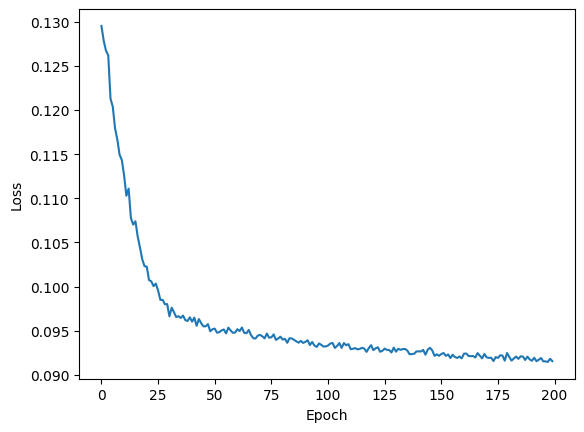

In [1042]:
def train_model(model, X, y, optimizer, loss_fn, epochs):
    model.train()
    epoch_vals = []
    loss_vals = []

    for epoch in range(epochs):
        epoch_vals.append(epoch)
        optimizer.zero_grad()
        output = model(X)

        loss = loss_fn(output, y)
        loss_vals.append(loss.item())
        loss.backward()

        optimizer.step()
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Loss = {loss.item()}')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(epoch_vals, loss_vals)
    plt.show()

# train_model(model, X_train, Y_train, optimizer, loss_fn, epochs=500)
train_model(model, X_train_t, Y_train_t, optimizer, loss_fn, epochs=200)

Epoch 0: Loss = 0.005298891104757786
Epoch 1: Loss = 0.002960451180115342
Epoch 2: Loss = 0.0055747125297784805
Epoch 3: Loss = 0.0012707574060186744


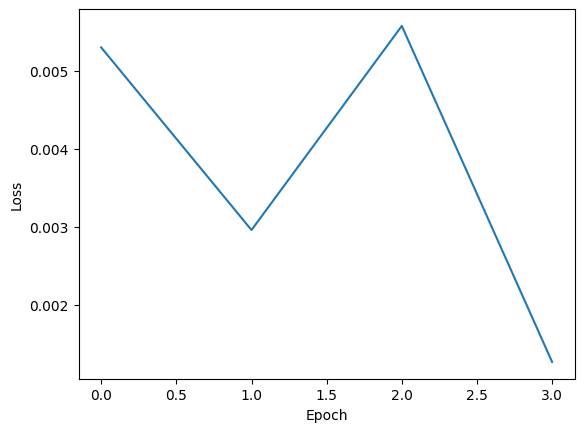

In [1025]:
def train_model(model, loader, optimizer, loss_fn, epochs):
    model.train()
    epoch_vals = []
    loss_vals = []

    for epoch in range(epochs):
      epoch_vals.append(epoch)
      last_loss = 0

      for X_batch, y_batch in train_loader:
        y_batch = y_batch.unsqueeze(1)
        y_pred = model(X_batch)

        loss = loss_fn(y_pred, y_batch)
        loss.backward()

        optimizer.step()
        last_loss = loss.item()
        optimizer.zero_grad()

      loss_vals.append(last_loss)
      print(f'Epoch {epoch}: Loss = {last_loss}')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(epoch_vals, loss_vals)
    plt.show()

train_model(model, train_loader, optimizer, loss_fn, epochs=4)

In [1043]:
model.eval()
y_pred = model(torch.tensor(X_test, dtype=torch.float32))
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
# y_test = y_test_tensor.detach().clone()
loss = loss_fn(y_pred, y_test_tensor)

print(f'Test Loss: {loss.item()}')

Test Loss: 4.342041492462158


In [1027]:
print(y_pred[7])
print(y_test_tensor[7])

tensor([-0.1028], grad_fn=<SelectBackward0>)
tensor([-0.1085])


In [ ]:
torch.save(model, "/content/drive/MyDrive/Ding Lab/Model")

In [816]:
def test_model(model, X_test, y_test, loss_fn):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        loss = loss_fn(predictions, y_test)
    return predictions, loss

In [1044]:
# RMSE
rmse = torch.sqrt(test_loss)
print(f'Root Mean Squared Error: {rmse.item()}')

# MAE
mae = torch.mean(torch.abs(y_pred - y_test_tensor))
print(f'Mean Absolute Error: {mae.item()}')

Root Mean Squared Error: 0.4104466140270233
Mean Absolute Error: 0.41620099544525146


#### Measuring Performance
For each gene, measure avg accuracy, correlation, MAE, MSE

In [1029]:
def MAE(pred, y):
  return abs(pred-y)

def MSE(pred, y):
  return (pred-y)**2

def RMSE(pred, y):
  return torch.sqrt(MSE(pred, y))

In [1030]:
# Given a gene, for each masked time point, measure metric on predicted value
def metric_for_timepoints(gene_no, metric_func, plot=False, printB=False):
  # gene = pick_gene(gene_no)
  # formatted_input = format_input(gene)

  gene = X[gene_no]
  max_TS = int(gene[-1])+1

  metric_values = []
  for i in range(max_TS):
    masked, y = mask([i], gene)
    masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

    prediction = model(masked) # Get predicted value for time point i
    metric_measure = metric_func(prediction, y)[0].item() # Measure error using metric_func
    metric_values.append(metric_measure) # Append value of error

    if printB: print(f'{metric_func.__name__} for time point {i}: {metric_measure}') # Print error value for each time point

  metric_values = np.array(metric_values)

  if printB:
    print(f'Average {metric_func.__name__}: {metric_values.sum()/len(metric_values)}') # Print average value for all time points
    print(f'Lowest time point: {metric_values.argmin()}')

  if plot:
    length = [x for x in range(len(gene))]
    metric_values = [x.item() for x in metric_values]
    plt.plot(length, metric_values)
    plt.xlabel('Time')
    plt.ylabel('Measurement')

  return metric_values # Error values with metric_func for all time points for gene_no

In [1031]:
vals = metric_for_timepoints(0, MAE, printB=True)

MAE for time point 0: 0.06643687188625336
MAE for time point 1: 0.10307091474533081
MAE for time point 2: 0.03470490872859955
MAE for time point 3: 0.041722074151039124
MAE for time point 4: 0.03271080553531647
MAE for time point 5: 0.019257746636867523
MAE for time point 6: 0.03572757542133331
Average MAE: 0.04766155672924859
Lowest time point: 5


In [1002]:
# Average metric of specific time point, for genes form 0 to test_timepoints. Prints avg for all genes at specified time point
def avg_metric_specifictime(metric_func, time_points=len(bulks_adata.obs), number_genes=len(bulks_adata.var), printB=False):
  avg_val = np.zeros(time_points)

  for i in range(number_genes):
    vals = metric_for_timepoints(i, metric_func)
    avg_val += vals

  avg_allTS = 0

  for t in range(time_points):
    avg_allTS += avg_val[t]/number_genes
    if printB: print(f'Average {metric_func.__name__} value for all genes at time point {t}: {avg_val[t]/number_genes}')

  print(f'Average {metric_func.__name__} value for all genes: {avg_allTS/time_points}')

  return avg_val

In [1032]:
tavg_MAE = avg_metric_specifictime(MAE, printB=True)

Average MAE value for all genes at time point 0: 0.15189610601896322
Average MAE value for all genes at time point 1: 0.10488828723835962
Average MAE value for all genes at time point 2: 0.0944257320339652
Average MAE value for all genes at time point 3: 0.08018083266335232
Average MAE value for all genes at time point 4: 0.08749742219701992
Average MAE value for all genes at time point 5: 0.061111980362137115
Average MAE value for all genes at time point 6: 0.07888514217057903
Average MAE value for all genes: 0.09412650038348236


In [1033]:
# Calculate correlation for predicted and truth value for all genes, at a specific time point
def correlation_timepoint(time_point, printB=False, plot=False):
  if time_point >= len(bulks_adata.obs):
    print(f'Time point {time_point} out of range')
    return None

  y_truth = np.zeros(len(bulks_adata.var))
  y_pred = np.zeros(len(bulks_adata.var))

  for i in range(len(bulks_adata.var)):
    # gene_i = pick_gene(i)
    # formatted_input = format_input(gene_i)
    formatted_input = X[i]

    masked, y = mask([time_point], formatted_input)
    masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

    prediction = model(masked) # Get predicted value for masked time_point

    y_truth[i] = y.item()
    y_pred[i] = prediction.item()

  SSR = np.square((y_truth-y_pred)).sum()
  SST = np.square((y_truth-y_truth.mean())).sum()
  R_square = 1 - SSR/SST

  r = scipy.stats.pearsonr(y_truth, y_pred)
  r_square = r[0]**2

  if printB:
    print(f'Pearson Correlation Coefficient (R) {time_point}: {r[0]}')
    print(f'Coefficient of Determination (R^2) {time_point}: {r_square}')
    print(f'R^2 manual {R_square}')

  if plot:
    plt.title(f"Scatter plot of true and predicted values for all genes at time {time_point}")
    plt.scatter(y_truth, y_pred)
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.show()
  return r[0]

Pearson Correlation Coefficient (R) 0: 0.7525964667472739
Coefficient of Determination (R^2) 0: 0.5664014417604805
R^2 manual 0.5188718239383877


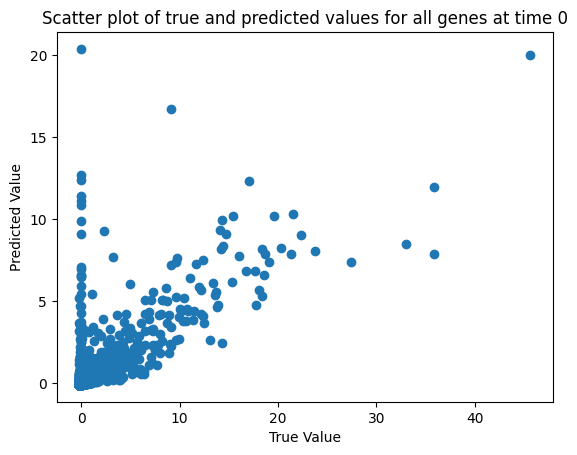

In [1034]:
r_0 = correlation_timepoint(0, True, True)

Pearson Correlation Coefficient 0: 0.8557331441318726
Coefficient of Determination 0: 0.7322792139658203
R^2 manual 0.7320841126865358


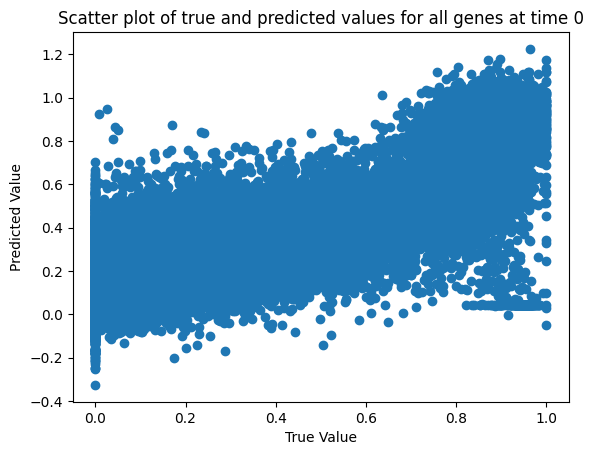

In [ ]:
r_0 = correlation_timepoint(0, True, True)

In [ ]:
# Calculate average correlation for predicted and truth value for all genes, for all time points
def correlation_avg(printB=False):
  avg_r = 0
  avg_r_square = 0
  for i in range(len(bulks_adata.obs)):
    r_i = correlation_timepoint(i)
    avg_r += r_i
    avg_r_square += r_i**2

  avg_r = avg_r/len(bulks_adata.obs)
  avg_r_square = avg_r_square/len(bulks_adata.obs)

  if printB:
    print(f'Average Pearson Correlation Coefficient (R): {avg_r}')
    print(f'Average Coefficient of Determination (R^2): {avg_r_square}')

  return avg_r, avg_r_square

In [ ]:
avg_r, avg_r_square = correlation_avg(printB=True)

Average Pearson Correlation Coefficient: 0.800186791717009
Average Coefficient of Determination: 0.6414143005432914
